# Лабораторная работа №3. Определение вида бабочки по изображению.

Подключение пакетов и архивов:

In [ ]:
from zipfile import ZipFile
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from PIL import Image
import os
import keras
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
%%capture
!wget https://www.dropbox.com/s/ivy51wqobna8wbt/train_fix.zip
!wget https://www.dropbox.com/s/lot1946ol8q8u85/test.zip

In [ ]:
data_dir = '/content'

height = 30
width = 30
channels = 3

In [ ]:
zip = ZipFile('train_fix.zip')
zip.extractall()

In [ ]:
train_path = '/content/train/train'

train_data = []
train_labels = []

In [ ]:
zip = ZipFile('test.zip')
zip.extractall()

In [ ]:
test_path = '/content/test'

test_data = []
test_labels = []

In [ ]:
NUM_CATEGORIES = 75

Изменение размеров изображений:

In [ ]:
train_img = os.listdir(train_path)
for f in sorted(train_img):
  image = Image.open(train_path + '/' + f)
  image = image.resize((height,width))
  image = np.array(image)
  train_data.append(image)
  train_labels.append(f[:f.index('(')-1].lower())

train_data = np.array(train_data)
train_labels = np.array(train_labels)

In [ ]:
test_img= os.listdir(test_path)
for f in sorted(test_img):
  image = Image.open(test_path + '/' + f)
  image = image.resize((height,width))
  image = np.array(image)
  test_data.append(image)
  test_labels.append(f[:f.index('(')-1].lower())

test_data = np.array(test_data)
test_labels = np.array(test_labels)

In [ ]:
print(train_data.shape,train_labels.shape)
print(test_data.shape,test_labels.shape)

(9285, 30, 30, 3) (9285,)
(750, 30, 30, 3) (750,)


In [ ]:
from sklearn.preprocessing import LabelEncoder

encoder=LabelEncoder()
train_labels = encoder.fit_transform(train_labels)
test_labels = encoder.transform(test_labels)

In [ ]:
print(train_data.shape,train_labels.shape)

X_train, X_test, Y_train, Y_test = train_test_split(train_data,train_labels,test_size=0.2,random_state=42, shuffle=True)

X_train = X_train/255
X_test = X_test/255

print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)

(9285, 30, 30, 3) (9285,)
(7428, 30, 30, 3) (1857, 30, 30, 3) (7428,) (1857,)


In [ ]:
Y_train = keras.utils.to_categorical(Y_train, NUM_CATEGORIES)
Y_test = keras.utils.to_categorical(Y_test, NUM_CATEGORIES)

print(Y_train.shape)
print(Y_test.shape)

(7428, 75)
(1857, 75)


Тест модели из образца:

In [ ]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(height,width,3)))
model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))

model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(NUM_CATEGORIES, activation='softmax'))

model.summary()

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 26, 26, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 13, 13, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 9, 9, 64)          36928     
                                                        

In [ ]:
aug = ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.15,
    horizontal_flip=False,
    vertical_flip=False,
    fill_mode="nearest")

batch_size = 32
epochs = 15

history = model.fit(aug.flow(X_train,Y_train,batch_size=batch_size),epochs=epochs, validation_data=(X_test, Y_test))

Epoch 1/15
233/233 [==============================] - 33s 130ms/step - loss: 3.9955 - accuracy: 0.0499 - val_loss: 3.3387 - val_accuracy: 0.1454
Epoch 2/15
233/233 [==============================] - 30s 128ms/step - loss: 3.2840 - accuracy: 0.1508 - val_loss: 2.7829 - val_accuracy: 0.2601
Epoch 3/15
233/233 [==============================] - 28s 121ms/step - loss: 2.8920 - accuracy: 0.2329 - val_loss: 2.4066 - val_accuracy: 0.3473
Epoch 4/15
233/233 [==============================] - 28s 122ms/step - loss: 2.5110 - accuracy: 0.3150 - val_loss: 2.1028 - val_accuracy: 0.4243
Epoch 5/15
233/233 [==============================] - 29s 126ms/step - loss: 2.2877 - accuracy: 0.3609 - val_loss: 1.9722 - val_accuracy: 0.4593
Epoch 6/15
233/233 [==============================] - 28s 121ms/step - loss: 2.0920 - accuracy: 0.4152 - val_loss: 1.9240 - val_accuracy: 0.4809
Epoch 7/15
233/233 [==============================] - 34s 148ms/step - loss: 1.9605 - accuracy: 0.4527 - val_loss: 1.7443 - val_ac

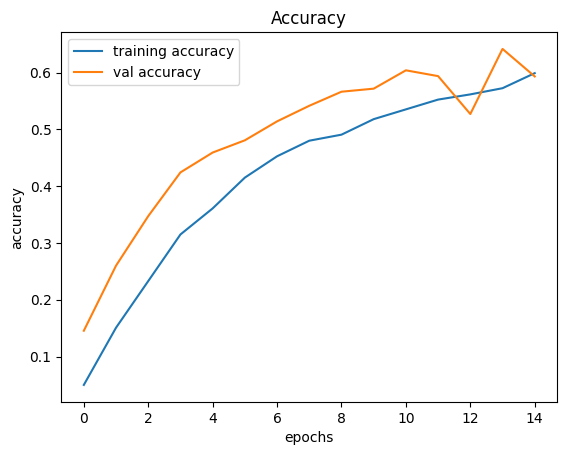

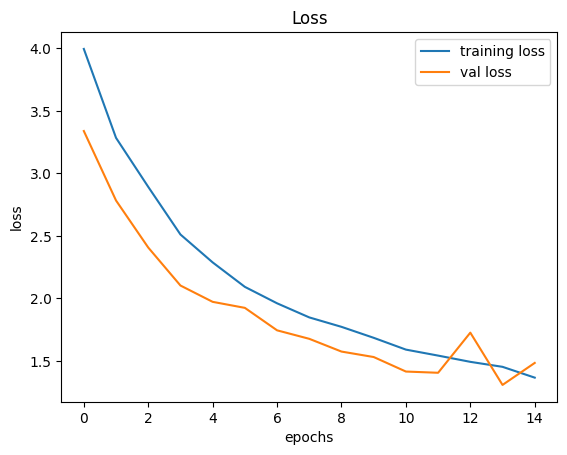

In [ ]:
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [ ]:
predict_x = model.predict(test_data)
classes_x = np.argmax(predict_x,axis=1)

24/24 [==============================] - 1s 25ms/step


In [ ]:
from sklearn.metrics import accuracy_score

print('Test Data accuracy: ',accuracy_score(test_labels, classes_x)*100)

Test Data accuracy:  30.4


Изменим число эпох с 15 на 20:

In [ ]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(height,width,3)))
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.2))

model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.2))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(NUM_CATEGORIES, activation='softmax'))

model.summary()

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

aug = ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.15,
    horizontal_flip=False,
    vertical_flip=False,
    fill_mode="nearest")

batch_size = 32
epochs = 20

history = model.fit(aug.flow(X_train,Y_train,batch_size=batch_size),epochs=epochs, validation_data=(X_test, Y_test))

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 28, 28, 32)        896       
                                                                 
 conv2d_5 (Conv2D)           (None, 26, 26, 32)        9248      
                                                                 
 conv2d_6 (Conv2D)           (None, 24, 24, 32)        9248      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 12, 12, 32)        0         
 g2D)                                                            
                                                                 
 dropout_3 (Dropout)         (None, 12, 12, 32)        0         
                                                                 
 conv2d_7 (Conv2D)           (None, 10, 10, 64)        18496     
                                                      

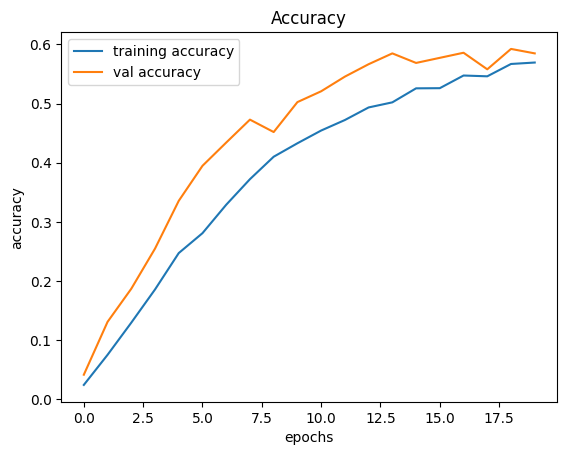

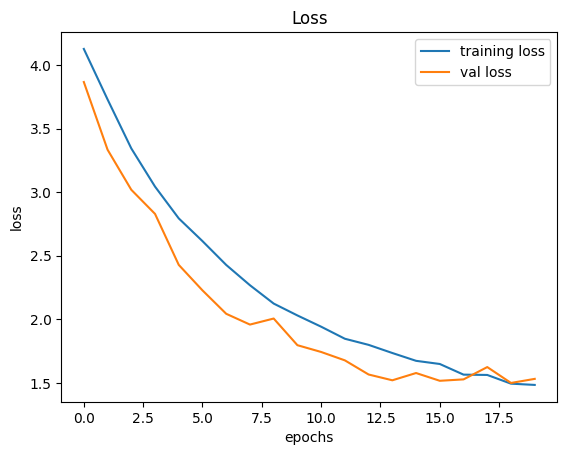

In [ ]:
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score

predict_x = model.predict(test_data)
classes_x = np.argmax(predict_x,axis=1)

print(f'Test Data accuracy: {accuracy_score(test_labels, classes_x)*100}%')

24/24 [==============================] - 1s 31ms/step
Test Data accuracy: 31.066666666666663%


Повторная прогонка первой модели:

In [ ]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(height,width,3)))
model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))

model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(NUM_CATEGORIES, activation='softmax'))

model.summary()

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

aug = ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.15,
    horizontal_flip=False,
    vertical_flip=False,
    fill_mode="nearest")

batch_size = 32
epochs = 20

history = model.fit(aug.flow(X_train,Y_train,batch_size=batch_size),epochs=epochs, validation_data=(X_test, Y_test))

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 28, 28, 32)        896       
                                                                 
 conv2d_11 (Conv2D)          (None, 26, 26, 32)        9248      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 dropout_6 (Dropout)         (None, 13, 13, 32)        0         
                                                                 
 conv2d_12 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 conv2d_13 (Conv2D)          (None, 9, 9, 64)          36928     
                                                      

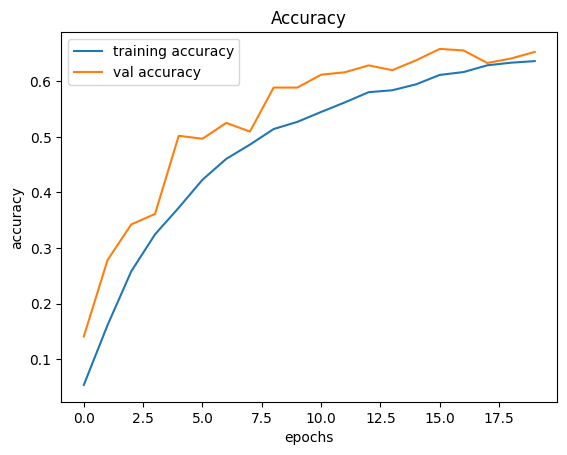

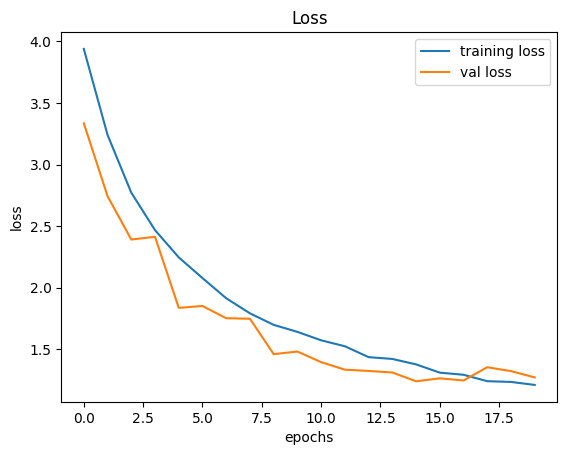

In [ ]:
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score

predict_x = model.predict(test_data)
classes_x = np.argmax(predict_x,axis=1)

print(f'Test Data accuracy: {accuracy_score(test_labels, classes_x)*100}%')

24/24 [==============================] - 1s 39ms/step
Test Data accuracy: 34.66666666666667%


Выставим число эпох 30:

In [ ]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(height,width,3)))
model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))

model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(NUM_CATEGORIES, activation='softmax'))

model.summary()

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

aug = ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.15,
    horizontal_flip=False,
    vertical_flip=False,
    fill_mode="nearest")

batch_size = 32
epochs = 30

history = model.fit(aug.flow(X_train,Y_train,batch_size=batch_size),epochs=epochs, validation_data=(X_test, Y_test))

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_14 (Conv2D)          (None, 28, 28, 32)        896       
                                                                 
 conv2d_15 (Conv2D)          (None, 26, 26, 32)        9248      
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 dropout_9 (Dropout)         (None, 13, 13, 32)        0         
                                                                 
 conv2d_16 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 conv2d_17 (Conv2D)          (None, 9, 9, 64)          36928     
                                                      

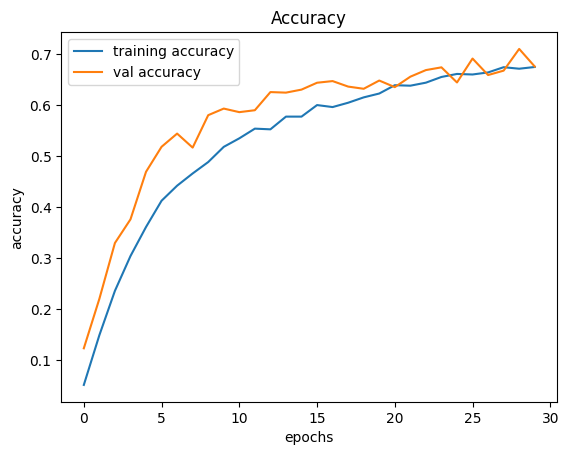

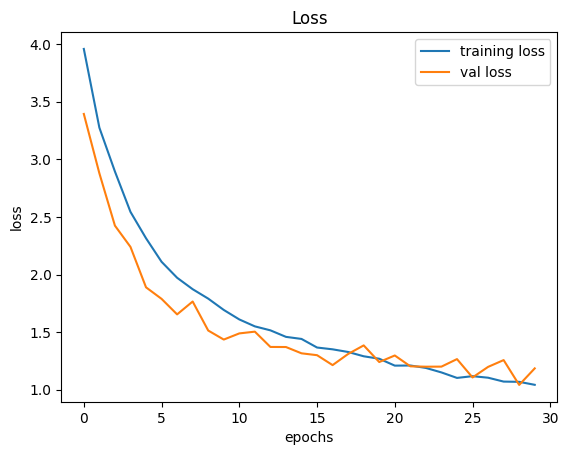

In [ ]:
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score

predict_x = model.predict(test_data)
classes_x = np.argmax(predict_x,axis=1)

print(f'Test Data accuracy: {accuracy_score(test_labels, classes_x)*100}%')

24/24 [==============================] - 1s 24ms/step
Test Data accuracy: 32.93333333333333%


Поставим 50 эпох:

In [ ]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(height,width,3)))
model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu'))
model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))

model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(NUM_CATEGORIES, activation='softmax'))

model.summary()

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

aug = ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.15,
    horizontal_flip=False,
    vertical_flip=False,
    fill_mode="nearest")

batch_size = 32
epochs = 50

history = model.fit(aug.flow(X_train,Y_train,batch_size=batch_size),epochs=epochs, validation_data=(X_test, Y_test))

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 28, 28, 32)        896       
                                                                 
 conv2d_19 (Conv2D)          (None, 26, 26, 32)        9248      
                                                                 
 conv2d_20 (Conv2D)          (None, 24, 24, 32)        9248      
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 12, 12, 32)        0         
 g2D)                                                            
                                                                 
 dropout_12 (Dropout)        (None, 12, 12, 32)        0         
                                                                 
 conv2d_21 (Conv2D)          (None, 10, 10, 64)        18496     
                                                      

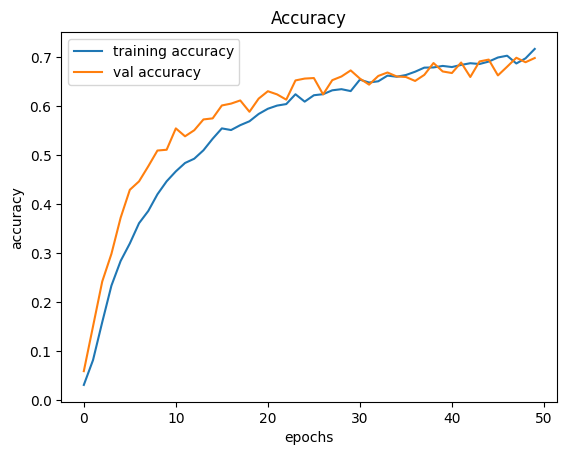

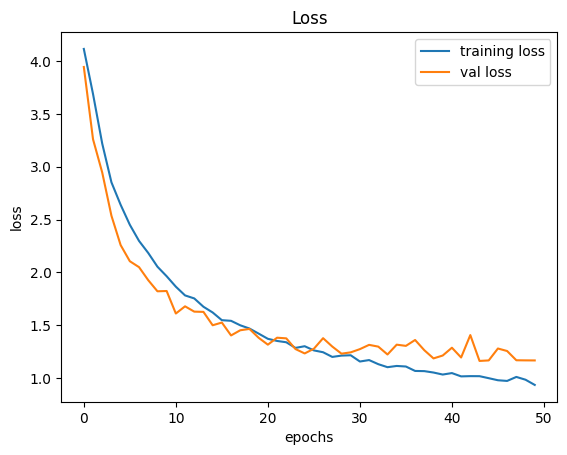

24/24 [==============================] - 1s 30ms/step
Test Data accuracy: 29.86666666666667%


In [ ]:
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

from sklearn.metrics import accuracy_score

predict_x = model.predict(test_data)
classes_x = np.argmax(predict_x,axis=1)

print(f'Test Data accuracy: {accuracy_score(test_labels, classes_x)*100}%')

Поставим batch_size 64:

In [ ]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(height,width,3)))
model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu'))
model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))

model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(NUM_CATEGORIES, activation='softmax'))

model.summary()

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

aug = ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.15,
    horizontal_flip=False,
    vertical_flip=False,
    fill_mode="nearest")

batch_size = 64
epochs = 50

history = model.fit(aug.flow(X_train,Y_train,batch_size=batch_size),epochs=epochs, validation_data=(X_test, Y_test))

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 28, 28, 32)        896       
                                                                 
 conv2d_25 (Conv2D)          (None, 26, 26, 32)        9248      
                                                                 
 conv2d_26 (Conv2D)          (None, 24, 24, 32)        9248      
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 12, 12, 32)        0         
 ng2D)                                                           
                                                                 
 dropout_15 (Dropout)        (None, 12, 12, 32)        0         
                                                                 
 conv2d_27 (Conv2D)          (None, 10, 10, 64)        18496     
                                                      

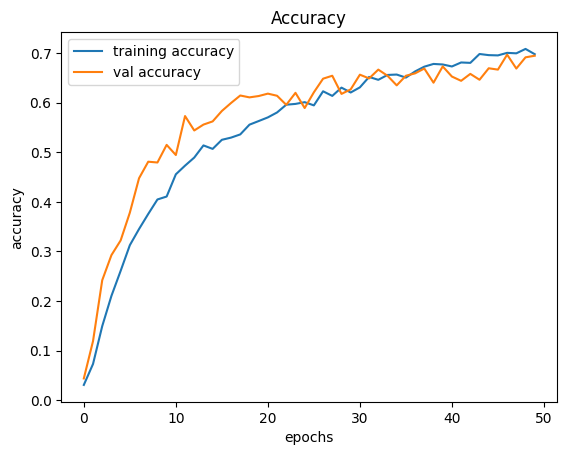

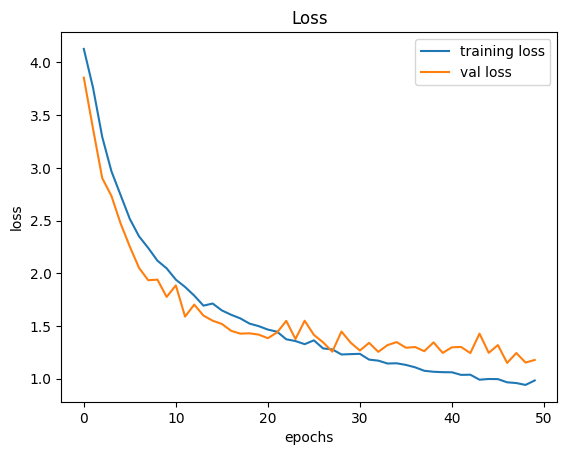

24/24 [==============================] - 2s 63ms/step
Test Data accuracy: 34.0%


In [ ]:
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

from sklearn.metrics import accuracy_score

predict_x = model.predict(test_data)
classes_x = np.argmax(predict_x,axis=1)

print(f'Test Data accuracy: {accuracy_score(test_labels, classes_x)*100}%')

In [ ]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(height,width,3)))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))

model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(3, 3)))
model.add(Dropout(rate=0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(NUM_CATEGORIES, activation='softmax'))

model.summary()

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

aug = ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.15,
    horizontal_flip=False,
    vertical_flip=False,
    fill_mode="nearest")

batch_size = 64
epochs = 50

history = model.fit(aug.flow(X_train,Y_train,batch_size=batch_size),epochs=epochs, validation_data=(X_test, Y_test))

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_30 (Conv2D)          (None, 28, 28, 32)        896       
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 14, 14, 32)        0         
 ng2D)                                                           
                                                                 
 dropout_18 (Dropout)        (None, 14, 14, 32)        0         
                                                                 
 conv2d_31 (Conv2D)          (None, 12, 12, 64)        18496     
                                                                 
 max_pooling2d_13 (MaxPooli  (None, 4, 4, 64)          0         
 ng2D)                                                           
                                                                 
 dropout_19 (Dropout)        (None, 4, 4, 64)         

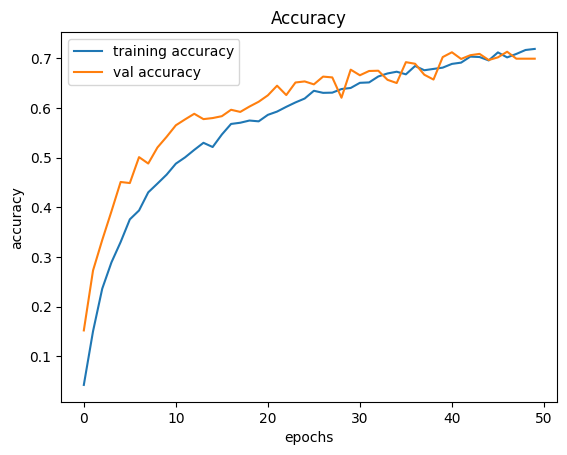

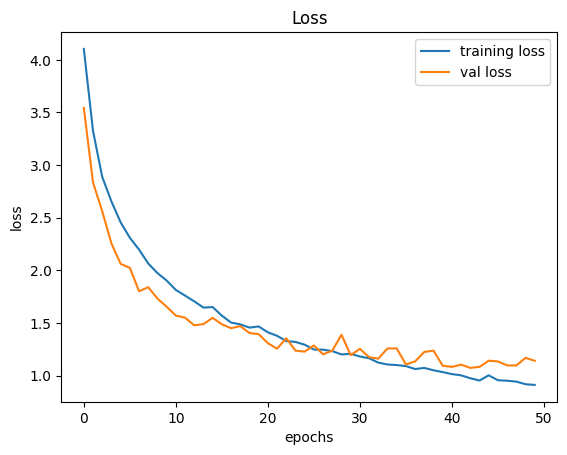

24/24 [==============================] - 0s 17ms/step
Test Data accuracy: 47.733333333333334%


In [ ]:
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

from sklearn.metrics import accuracy_score

predict_x = model.predict(test_data)
classes_x = np.argmax(predict_x,axis=1)

print(f'Test Data accuracy: {accuracy_score(test_labels, classes_x)*100}%')

In [ ]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(height,width,3)))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.1))

model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(3, 3)))
model.add(Dropout(rate=0.1))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(rate=0.25))
model.add(Dense(NUM_CATEGORIES, activation='softmax'))

model.summary()

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

aug = ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.15,
    horizontal_flip=False,
    vertical_flip=False,
    fill_mode="nearest")

batch_size = 64
epochs = 50

history = model.fit(aug.flow(X_train,Y_train,batch_size=batch_size),epochs=epochs, validation_data=(X_test, Y_test))

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_32 (Conv2D)          (None, 28, 28, 32)        896       
                                                                 
 max_pooling2d_14 (MaxPooli  (None, 14, 14, 32)        0         
 ng2D)                                                           
                                                                 
 dropout_21 (Dropout)        (None, 14, 14, 32)        0         
                                                                 
 conv2d_33 (Conv2D)          (None, 12, 12, 64)        18496     
                                                                 
 max_pooling2d_15 (MaxPooli  (None, 4, 4, 64)          0         
 ng2D)                                                           
                                                                 
 dropout_22 (Dropout)        (None, 4, 4, 64)         

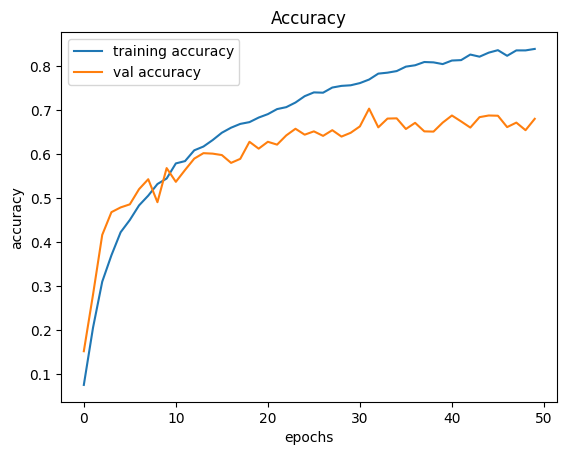

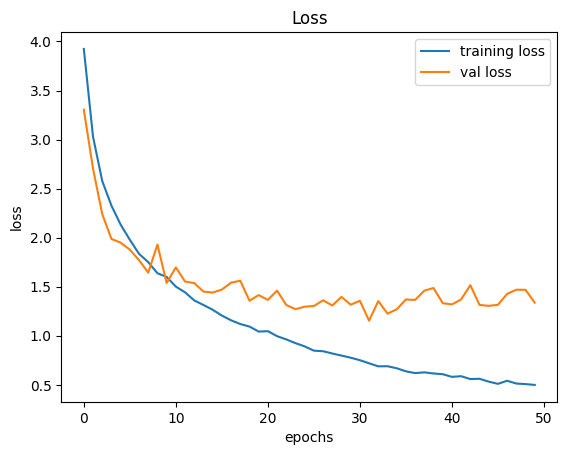

24/24 [==============================] - 0s 13ms/step
Test Data accuracy: 49.06666666666666%


In [ ]:
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

from sklearn.metrics import accuracy_score

predict_x = model.predict(test_data)
classes_x = np.argmax(predict_x,axis=1)

print(f'Test Data accuracy: {accuracy_score(test_labels, classes_x)*100}%')

In [ ]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(height,width,3)))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.1))

model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.1))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(rate=0.2))
model.add(Dense(NUM_CATEGORIES, activation='softmax'))

model.summary()

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

aug = ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.15,
    horizontal_flip=False,
    vertical_flip=False,
    fill_mode="nearest")

batch_size = 64
epochs = 50

history = model.fit(aug.flow(X_train,Y_train,batch_size=batch_size),epochs=epochs, validation_data=(X_test, Y_test))

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_34 (Conv2D)          (None, 28, 28, 32)        896       
                                                                 
 max_pooling2d_16 (MaxPooli  (None, 14, 14, 32)        0         
 ng2D)                                                           
                                                                 
 dropout_24 (Dropout)        (None, 14, 14, 32)        0         
                                                                 
 conv2d_35 (Conv2D)          (None, 12, 12, 64)        18496     
                                                                 
 max_pooling2d_17 (MaxPooli  (None, 6, 6, 64)          0         
 ng2D)                                                           
                                                                 
 dropout_25 (Dropout)        (None, 6, 6, 64)         

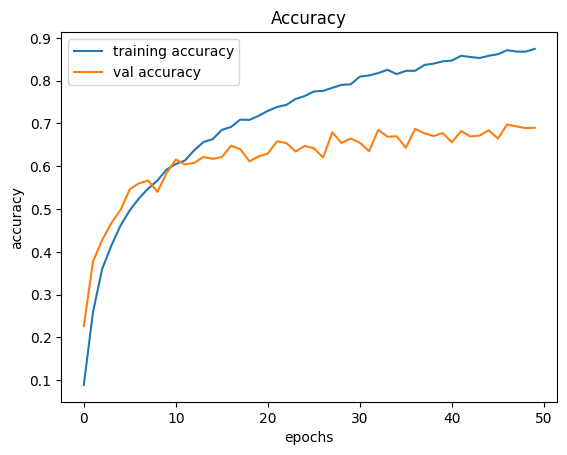

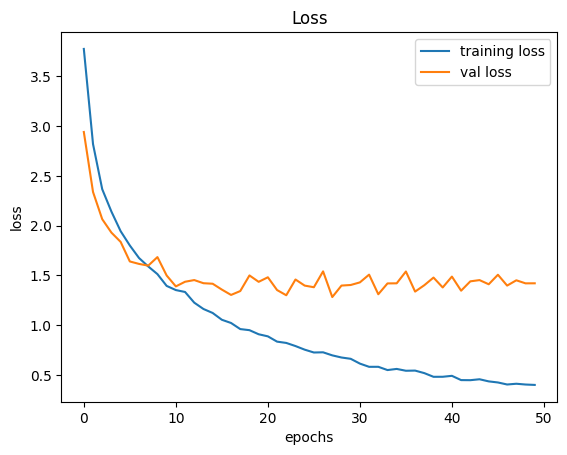

24/24 [==============================] - 0s 14ms/step
Test Data accuracy: 47.199999999999996%


In [ ]:
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

from sklearn.metrics import accuracy_score

predict_x = model.predict(test_data)
classes_x = np.argmax(predict_x,axis=1)

print(f'Test Data accuracy: {accuracy_score(test_labels, classes_x)*100}%')

In [ ]:
model = Sequential()

model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', input_shape=(height,width,3)))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.1))

model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.1))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(rate=0.2))
model.add(Dense(NUM_CATEGORIES, activation='softmax'))

model.summary()

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

aug = ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    horizontal_flip=False,
    vertical_flip=False,
    fill_mode="nearest")

batch_size = 64
epochs = 50

history = model.fit(aug.flow(X_train,Y_train,batch_size=batch_size),epochs=epochs, validation_data=(X_test, Y_test))

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 28, 28, 64)        1792      
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 14, 14, 64)        0         
 g2D)                                                            
                                                                 
 dropout_9 (Dropout)         (None, 14, 14, 64)        0         
                                                                 
 conv2d_7 (Conv2D)           (None, 12, 12, 128)       73856     
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 6, 6, 128)         0         
 g2D)                                                            
                                                                 
 dropout_10 (Dropout)        (None, 6, 6, 128)        

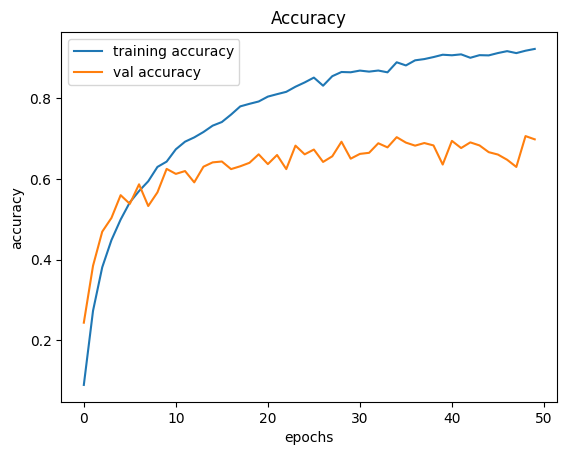

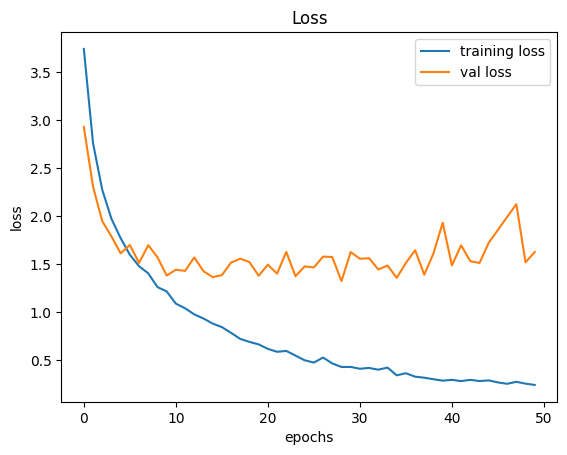

24/24 [==============================] - 1s 40ms/step
Test Data accuracy: 51.733333333333334%


In [ ]:
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

from sklearn.metrics import accuracy_score

predict_x = model.predict(test_data)
classes_x = np.argmax(predict_x,axis=1)

print(f'Test Data accuracy: {accuracy_score(test_labels, classes_x)*100}%')